# Анализ характеристик ноутбуков

# Введение

#### Цель проекта — провести анализ данных о ноутбуках для определения наиболее подходящих моделей в зависимости от характеристик, таких как цена, вес, производительность и другие параметры.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"C:\Users\User\Downloads\archive (5)\laptops.csv"
df = pd.read_csv(file_path)

print(df.info())
print(df.describe())
df.head()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       991 non-null    int64  
 1   brand                       991 non-null    object 
 2   Model                       991 non-null    object 
 3   Price                       991 non-null    int64  
 4   Rating                      991 non-null    int64  
 5   processor_brand             991 non-null    object 
 6   processor_tier              991 non-null    object 
 7   num_cores                   991 non-null    int64  
 8   num_threads                 991 non-null    int64  
 9   ram_memory                  991 non-null    int64  
 10  primary_storage_type        991 non-null    object 
 11  primary_storage_capacity    991 non-null    int64  
 12  secondary_storage_type      991 non-null    object 
 13  secondary_storage_capacity  991 non

,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,secondary_storage_type,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,23990,63,intel,core i3,2,4,8,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,35990,67,intel,core i7,4,8,16,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,51100,73,amd,ryzen 5,6,12,8,...,No secondary storage,0,amd,dedicated,False,15.6,1920,1080,windows,1
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,39990,62,intel,core i5,12,16,8,...,No secondary storage,0,intel,integrated,False,14.0,1920,1080,windows,1
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,28580,62,amd,ryzen 3,4,8,8,...,No secondary storage,0,amd,integrated,False,15.6,1920,1080,windows,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,998,asus,Asus Vivobook Pro 15 M6500QC-HN542WS Laptop (R...,65990,68,amd,ryzen 5,6,12,16,...,No secondary storage,0,nvidia,dedicated,False,15.6,1920,1080,windows,1
987,999,msi,MSI Thin GF63 12VE-070IN Gaming Laptop (12th G...,91990,73,intel,core i7,10,16,16,...,No secondary storage,0,nvidia,dedicated,False,15.6,1920,1080,windows,2
988,1000,asus,Asus Vivobook Go 15 2023 E1504FA-NJ522WS Lapto...,44990,59,amd,ryzen 5,4,8,8,...,No secondary storage,0,amd,integrated,False,15.6,1920,1080,windows,1
989,1001,asus,Asus Zenbook 14 2023 UM3402YA-KP541WS Laptop (...,67990,68,amd,ryzen 5,6,12,16,...,No secondary storage,0,amd,integrated,False,14.0,2560,1600,windows,1


In [30]:
df = df.drop_duplicates()
df

,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,secondary_storage_type,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,23990,63,intel,core i3,2,4,8,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,35990,67,intel,core i7,4,8,16,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,51100,73,amd,ryzen 5,6,12,8,...,No secondary storage,0,amd,dedicated,False,15.6,1920,1080,windows,1
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,39990,62,intel,core i5,12,16,8,...,No secondary storage,0,intel,integrated,False,14.0,1920,1080,windows,1
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,28580,62,amd,ryzen 3,4,8,8,...,No secondary storage,0,amd,integrated,False,15.6,1920,1080,windows,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,998,asus,Asus Vivobook Pro 15 M6500QC-HN542WS Laptop (R...,65990,68,amd,ryzen 5,6,12,16,...,No secondary storage,0,nvidia,dedicated,False,15.6,1920,1080,windows,1
987,999,msi,MSI Thin GF63 12VE-070IN Gaming Laptop (12th G...,91990,73,intel,core i7,10,16,16,...,No secondary storage,0,nvidia,dedicated,False,15.6,1920,1080,windows,2
988,1000,asus,Asus Vivobook Go 15 2023 E1504FA-NJ522WS Lapto...,44990,59,amd,ryzen 5,4,8,8,...,No secondary storage,0,amd,integrated,False,15.6,1920,1080,windows,1
989,1001,asus,Asus Zenbook 14 2023 UM3402YA-KP541WS Laptop (...,67990,68,amd,ryzen 5,6,12,16,...,No secondary storage,0,amd,integrated,False,14.0,2560,1600,windows,1


In [23]:
# Преобразование 'year_of_warranty' в числовой формат
df['year_of_warranty'] = pd.to_numeric(df['year_of_warranty'], errors='coerce').fillna(0).astype(int)

In [25]:
# Количество строк до удаления выбросов
initial_rows = len(df)

Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Удаление выбросов
df_cleaned = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

# Вывод количества строк до и после
print(f"Количество строк до удаления выбросов: {initial_rows}")
print(f"Количество строк после удаления выбросов: {len(df_cleaned)}")

Количество строк до удаления выбросов: 991
Количество строк после удаления выбросов: 920


In [22]:
print(df_cleaned.describe())

             index          Price      Rating   num_cores  num_threads  \
count   920.000000     920.000000  920.000000  920.000000   920.000000   
mean    501.978261   64721.828261   62.769565    7.506522    11.416304   
std     288.997038   30489.723235    9.311391    3.386583     4.627067   
min       1.000000    9800.000000   24.000000    2.000000     0.000000   
25%     253.750000   41944.500000   57.000000    5.750000     8.000000   
50%     501.500000   58990.000000   63.000000    8.000000    12.000000   
75%     748.250000   79990.000000   70.000000   10.000000    16.000000   
max    1002.000000  155299.000000   88.000000   24.000000    32.000000   

       ram_memory  primary_storage_capacity  secondary_storage_capacity  \
count  920.000000                920.000000                  920.000000   
mean    12.297826                573.495652                    4.313043   
std      4.340561                216.166114                   34.806817   
min      2.000000                

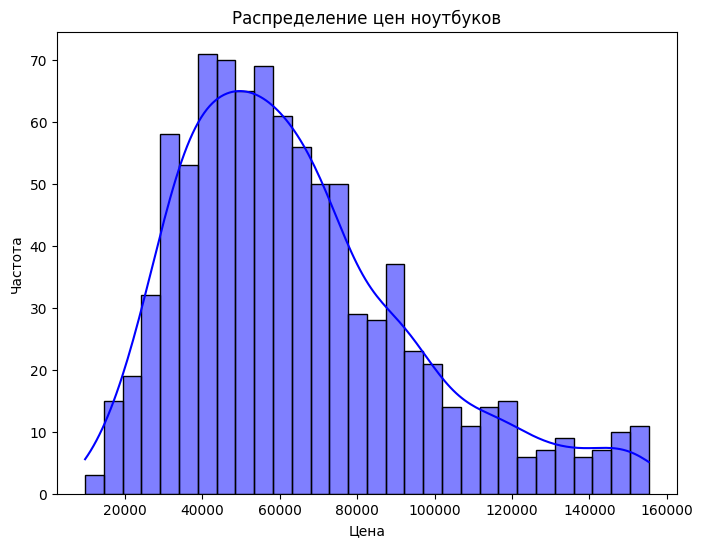

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['Price'], kde=True, bins=30, color='blue')
plt.title("Распределение цен ноутбуков")
plt.xlabel("Цена")
plt.ylabel("Частота")
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_13556\1442083794.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', fmt=".2f")


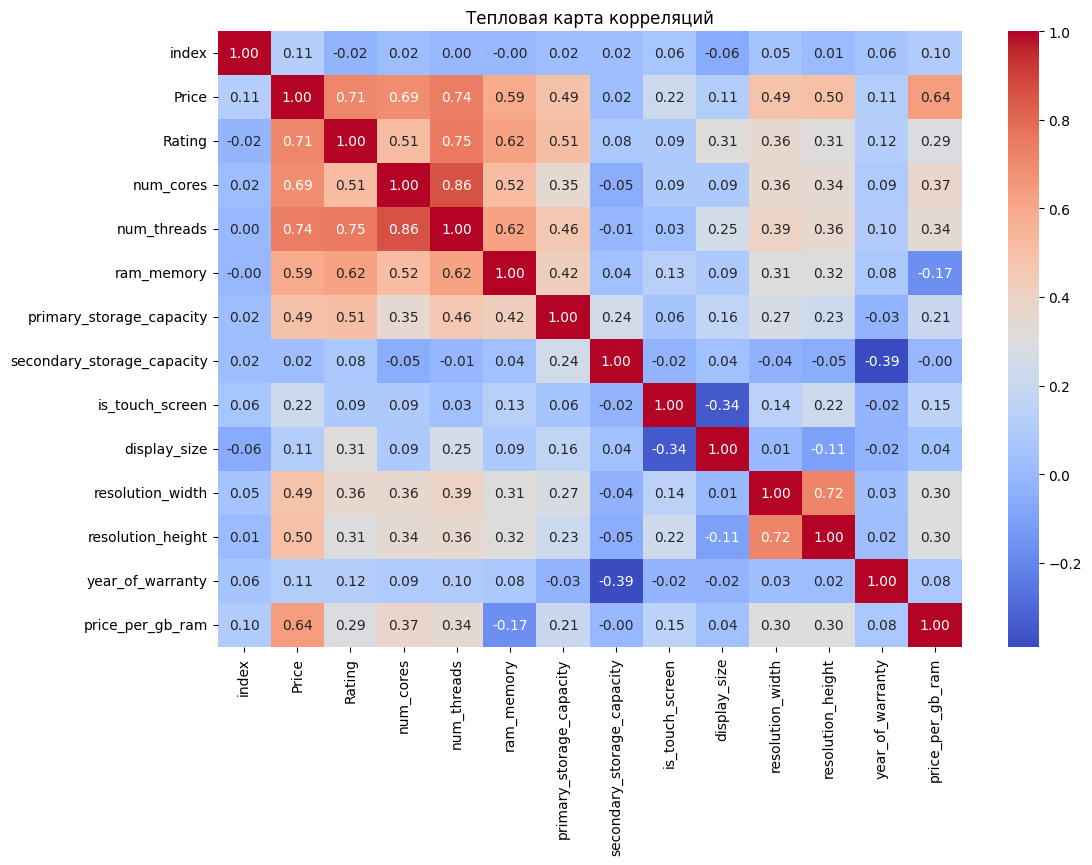

In [24]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Тепловая карта корреляций")
plt.show()

In [12]:
# Расчет цены за ГБ оперативной памяти
df_cleaned['price_per_gb_ram'] = (df_cleaned['Price'] / df_cleaned['ram_memory']).round(2)  # вычислить стоимость одного гигабайта RAM
df_cleaned   # после , 2 цифр

C:\Users\User\AppData\Local\Temp\ipykernel_13556\996886977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['price_per_gb_ram'] = (df_cleaned['Price'] / df_cleaned['ram_memory']).round(2)


,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty,price_per_gb_ram
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,23990,63,intel,core i3,2,4,8,...,0,intel,integrated,False,15.6,1920,1080,windows,1,2998.75
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,35990,67,intel,core i7,4,8,16,...,0,intel,integrated,False,15.6,1920,1080,windows,1,2249.38
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,51100,73,amd,ryzen 5,6,12,8,...,0,amd,dedicated,False,15.6,1920,1080,windows,1,6387.50
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,39990,62,intel,core i5,12,16,8,...,0,intel,integrated,False,14.0,1920,1080,windows,1,4998.75
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,28580,62,amd,ryzen 3,4,8,8,...,0,amd,integrated,False,15.6,1920,1080,windows,1,3572.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,998,asus,Asus Vivobook Pro 15 M6500QC-HN542WS Laptop (R...,65990,68,amd,ryzen 5,6,12,16,...,0,nvidia,dedicated,False,15.6,1920,1080,windows,1,4124.38
987,999,msi,MSI Thin GF63 12VE-070IN Gaming Laptop (12th G...,91990,73,intel,core i7,10,16,16,...,0,nvidia,dedicated,False,15.6,1920,1080,windows,2,5749.38
988,1000,asus,Asus Vivobook Go 15 2023 E1504FA-NJ522WS Lapto...,44990,59,amd,ryzen 5,4,8,8,...,0,amd,integrated,False,15.6,1920,1080,windows,1,5623.75
989,1001,asus,Asus Zenbook 14 2023 UM3402YA-KP541WS Laptop (...,67990,68,amd,ryzen 5,6,12,16,...,0,amd,integrated,False,14.0,2560,1600,windows,1,4249.38


In [14]:
 # Категоризация по ценам
def categorize_price(price):
    if price < 30000:
        return "Budget"
    elif 30000 <= price < 70000:
        return "Mid-range"
    else:
        return "Premium"

df_cleaned['price_category'] = df_cleaned['Price'].apply(categorize_price)
df_cleaned

C:\Users\User\AppData\Local\Temp\ipykernel_13556\1598233258.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['price_category'] = df_cleaned['Price'].apply(categorize_price)


,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty,price_per_gb_ram,price_category
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,23990,63,intel,core i3,2,4,8,...,intel,integrated,False,15.6,1920,1080,windows,1,2998.75,Budget
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,35990,67,intel,core i7,4,8,16,...,intel,integrated,False,15.6,1920,1080,windows,1,2249.38,Mid-range
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,51100,73,amd,ryzen 5,6,12,8,...,amd,dedicated,False,15.6,1920,1080,windows,1,6387.50,Mid-range
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,39990,62,intel,core i5,12,16,8,...,intel,integrated,False,14.0,1920,1080,windows,1,4998.75,Mid-range
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,28580,62,amd,ryzen 3,4,8,8,...,amd,integrated,False,15.6,1920,1080,windows,1,3572.50,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,998,asus,Asus Vivobook Pro 15 M6500QC-HN542WS Laptop (R...,65990,68,amd,ryzen 5,6,12,16,...,nvidia,dedicated,False,15.6,1920,1080,windows,1,4124.38,Mid-range
987,999,msi,MSI Thin GF63 12VE-070IN Gaming Laptop (12th G...,91990,73,intel,core i7,10,16,16,...,nvidia,dedicated,False,15.6,1920,1080,windows,2,5749.38,Premium
988,1000,asus,Asus Vivobook Go 15 2023 E1504FA-NJ522WS Lapto...,44990,59,amd,ryzen 5,4,8,8,...,amd,integrated,False,15.6,1920,1080,windows,1,5623.75,Mid-range
989,1001,asus,Asus Zenbook 14 2023 UM3402YA-KP541WS Laptop (...,67990,68,amd,ryzen 5,6,12,16,...,amd,integrated,False,14.0,2560,1600,windows,1,4249.38,Mid-range


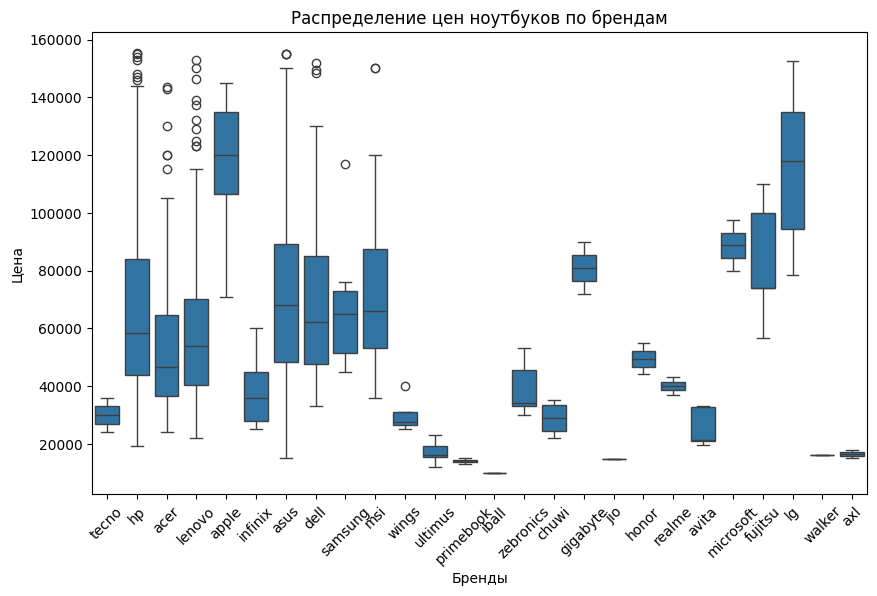

In [31]:
# 
plt.figure(figsize=(10, 6))
sns.boxplot(x='brand', y='Price', data=df_cleaned)
plt.title("Распределение цен ноутбуков по брендам")
plt.xlabel("Бренды")
plt.ylabel("Цена")
plt.xticks(rotation=45)
plt.show()


In [16]:
# Построение сводной таблицы
price_pivot_table = df_cleaned.pivot_table(
    values='Price',
    index='brand',
    columns='price_category',
    aggfunc='mean'
).fillna(0)

print(price_pivot_table)

price_category        Budget     Mid-range        Premium
brand                                                    
acer            28389.900000  46330.122807   99628.588235
apple               0.000000      0.000000  116990.000000
asus            23070.166667  52866.040816   97565.666667
avita           20603.333333  32749.500000       0.000000
axl             16490.000000      0.000000       0.000000
chuwi           23490.000000  33990.000000       0.000000
dell                0.000000  50888.944444   94756.235294
fujitsu             0.000000  56494.000000   89490.000000
gigabyte            0.000000      0.000000   80990.000000
honor               0.000000  49490.000000       0.000000
hp              24864.733333  50266.149533  101932.605634
iball            9800.000000      0.000000       0.000000
infinix         27190.000000  45115.000000       0.000000
jio             14701.000000      0.000000       0.000000
lenovo          25510.642857  49461.261538   96695.725490
lg            